In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv("googleplaystore_raw.csv")

In [3]:
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Prep

## Fixing Installs

In [4]:
df_raw = df_raw[df_raw.Installs != "Free"]
df_raw = df_raw[df_raw.Installs != "0"]

df_raw.Installs = df_raw.Installs.str[:-1]
df_raw.Installs = df_raw.Installs.apply(lambda x: int(x.replace(",","")))

## fixing Size

In [5]:
def fix_size(x):
    if(x[-1] == "M"):
        return float(x[:-1])*1024
    elif(x[-1] == "k") : 
        return float(x[:-1])
    else:
        return np.nan

In [6]:
df_raw.Size = df_raw.Size.apply(fix_size)

## Fixing Update Time

In [7]:
df_raw["Last Updated"] = pd.to_datetime(df_raw["Last Updated"])

In [8]:
df_raw.Type.unique()

array(['Free', 'Paid'], dtype=object)

## Fix Type -> isPaid

In [9]:
df_raw.rename(columns = {"Type": "isPaid"}, inplace=True)
df_raw.isPaid= df_raw.isPaid == "Paid"

## Reviews -> int

In [10]:
df_raw.Reviews = df_raw.Reviews.astype(int)

In [11]:
df = df_raw.copy()

In [12]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,isPaid,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,False,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,False,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,False,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,False,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,False,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


## remove Reviews > Installs

In [13]:
df =  df[df["Reviews"]<=df["Installs"]]

## Analysis of Categories

### General Review

In [14]:
df_gen_group  = df.groupby("Category",as_index=False).mean()

C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\3917938559.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gen_group  = df.groupby("Category",as_index=False).mean()


In [15]:
df_gen_group.head()

,Category,Rating,Reviews,Size,Installs,isPaid
0,ART_AND_DESIGN,4.358065,26376.000000,12667.870968,1.912894e+06,0.046154
1,AUTO_AND_VEHICLES,4.190411,13690.188235,20517.690667,6.250613e+05,0.035294
2,BEAUTY,4.278571,7476.226415,14126.842553,5.131519e+05,0.000000
3,BOOKS_AND_REFERENCE,4.346067,95060.904762,13629.632487,8.318050e+06,0.121212
4,BUSINESS,4.121452,30335.982609,14819.202500,2.178076e+06,0.030435


In [16]:
#fig = px.scatter(data_frame = df_gen_group, x="Installs", y="Reviews", hover_data=["Category"],width=800, height=600)
#fig.show()

### Rating

In [17]:
def plot_dist(parameter) :
    fig, ax = plt.subplots(1,3,figsize=(20,5))

    sns.histplot(df[parameter], ax = ax[0])

    sns.histplot(data=df[df["isPaid"]], x=parameter, color="red", label="Paid", kde=True, ax = ax[1])
    sns.histplot(data=df[~df["isPaid"]], x=parameter, color="skyblue", label="Free", kde=True, ax = ax[1])

    sns.kdeplot(data=df[df["isPaid"]], x=parameter, color="red", label="Paid", ax = ax[2])
    sns.kdeplot(data=df[~df["isPaid"]], x=parameter, color="skyblue", label="Free", ax = ax[2])

    plt.legend() 
    plt.show()

In [18]:
def box_plots(parameter):
    h = df.groupby("Category").mean().sort_values(parameter, ascending=False).head(10)
    t = df.groupby("Category").mean().sort_values(parameter, ascending=False).tail(10)

    h1 = h.merge(df, right_on="Category", left_index=True, how ="left")
    t1 = t.merge(df, right_on="Category", left_index=True, how ="left")

    fig, ax = plt.subplots(2,2,figsize=(20,15))


    ax[0,0].tick_params(labelrotation=30)
    sns.boxplot(x="Category", y=parameter+"_y", data=h1, palette="Pastel1" ,ax =ax[0,0],) ## highest means
    ax[0,1].tick_params(labelrotation=30)
    sns.boxplot(x="Category", y=parameter+"_y", data=t1, palette="Pastel1" ,ax =ax[0,1],) ## lowest means
    ax[1,0].tick_params(labelrotation=30)

    sns.boxplot(x="Category", y=parameter+"_y", data=h1, palette="Pastel1" ,ax =ax[1,0], hue="isPaid_y") ## highest means
    #ax[1,0].legend(title='isPaid', labels=['Paid', 'Free'], loc='lower left', ncol=1)
    handles, _ = ax[1,0].get_legend_handles_labels()
    ax[1,0].legend(handles, ["Free", "Paid"], title = "isPaid")

    ax[1,1].tick_params(labelrotation=30)
    sns.boxplot(x="Category", y=parameter+"_y", data=t1, palette="Pastel1" ,ax =ax[1,1], hue="isPaid_y") ## lowest means
    #ax[1,1].legend(title='isPaid', labels=['Paid', 'Free'],loc='lower left', ncol=1)
    handles, _ = ax[1,1].get_legend_handles_labels()
    ax[1,1].legend(handles, ["Free", "Paid"], title = "isPaid")

    for i in [0, 1]:
        for j in [0, 1]:
            ax[i, j].set_ylabel(parameter)



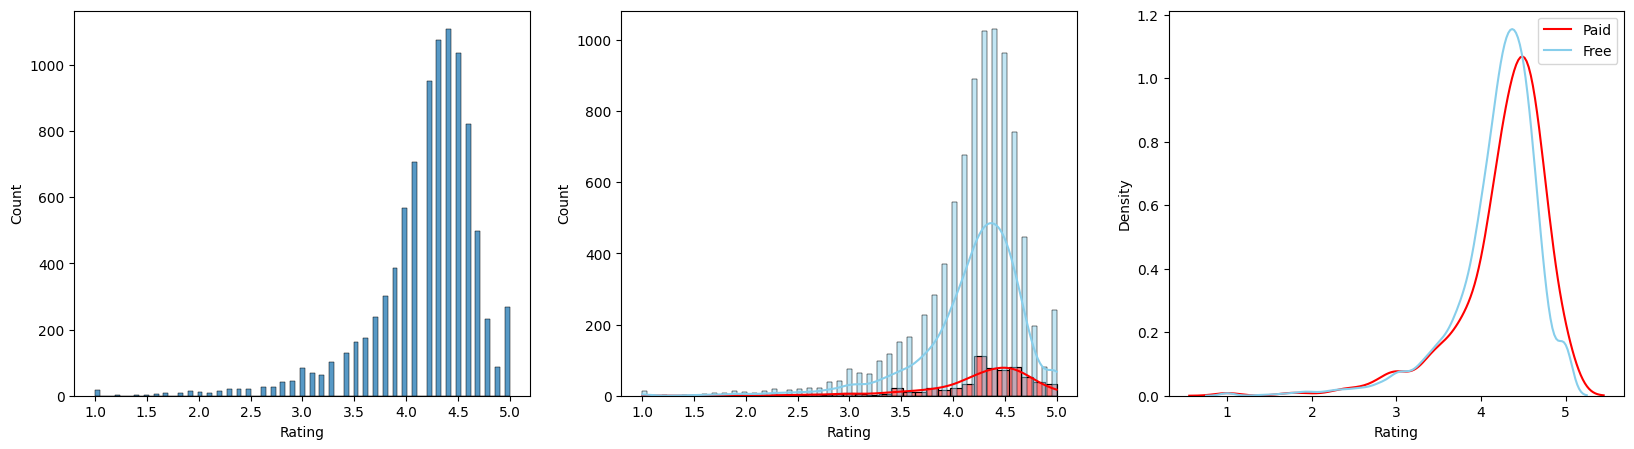

In [19]:
plot_dist("Rating")

C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\3088051632.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  h = df.groupby("Category").mean().sort_values(parameter, ascending=False).head(10)
C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\3088051632.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df.groupby("Category").mean().sort_values(parameter, ascending=False).tail(10)


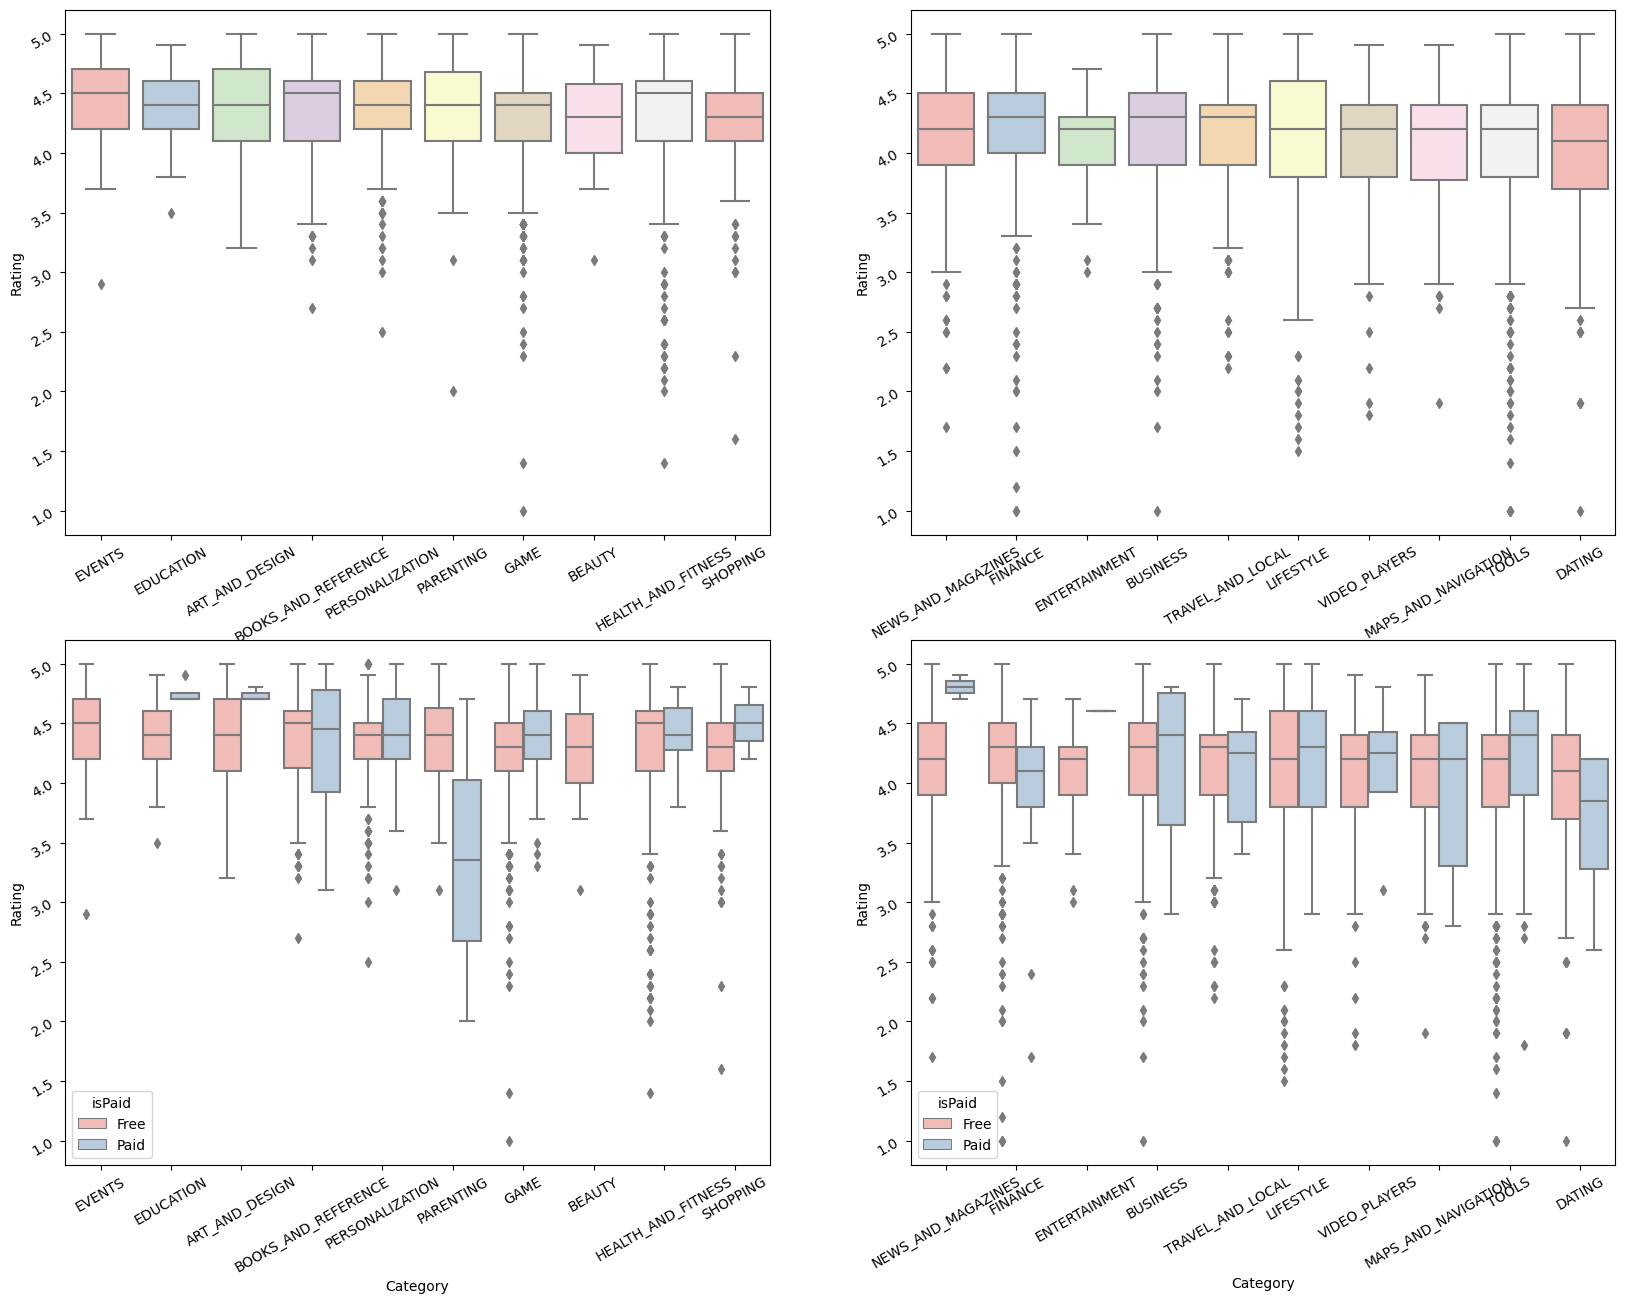

In [20]:
box_plots("Rating")

In [21]:
def paid_bar(parameter, labels):
    temp = df.groupby(["Category"]).mean()[[parameter]]

    temp = pd.concat([temp, df.groupby(["Category","isPaid"],as_index=False).mean().pivot_table(index="Category", columns="isPaid",values=parameter)],axis=1)
    ax =temp.sort_values(parameter,ascending=False).plot.bar(figsize=(25,5))
    ax.legend(labels= labels, ncol=3)


C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\1761103082.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = df.groupby(["Category"]).mean()[[parameter]]
C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\1761103082.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = pd.concat([temp, df.groupby(["Category","isPaid"],as_index=False).mean().pivot_table(index="Category", columns="isPaid",values=parameter)],axis=1)


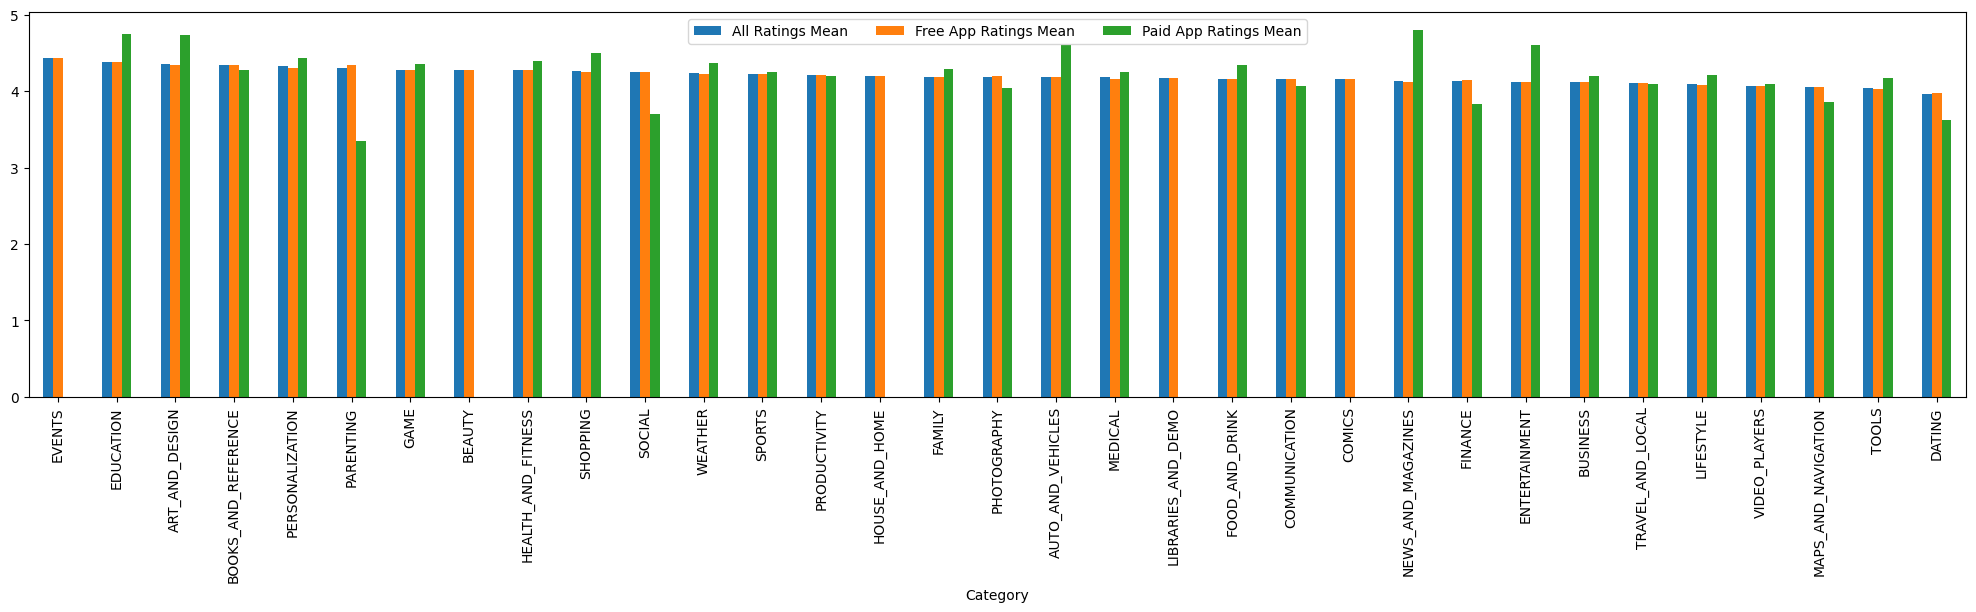

In [22]:
paid_bar("Rating", ["All Ratings Mean",'Free App Ratings Mean', 'Paid App Ratings Mean'])

In [23]:
qt = df["Installs"].quantile(0.95)
qd = df["Installs"].quantile(0.05)

In [24]:
df_outliernt = df[(df["Installs"] < qt) &(df["Installs"] > qd) ]

<AxesSubplot: ylabel='Rating'>

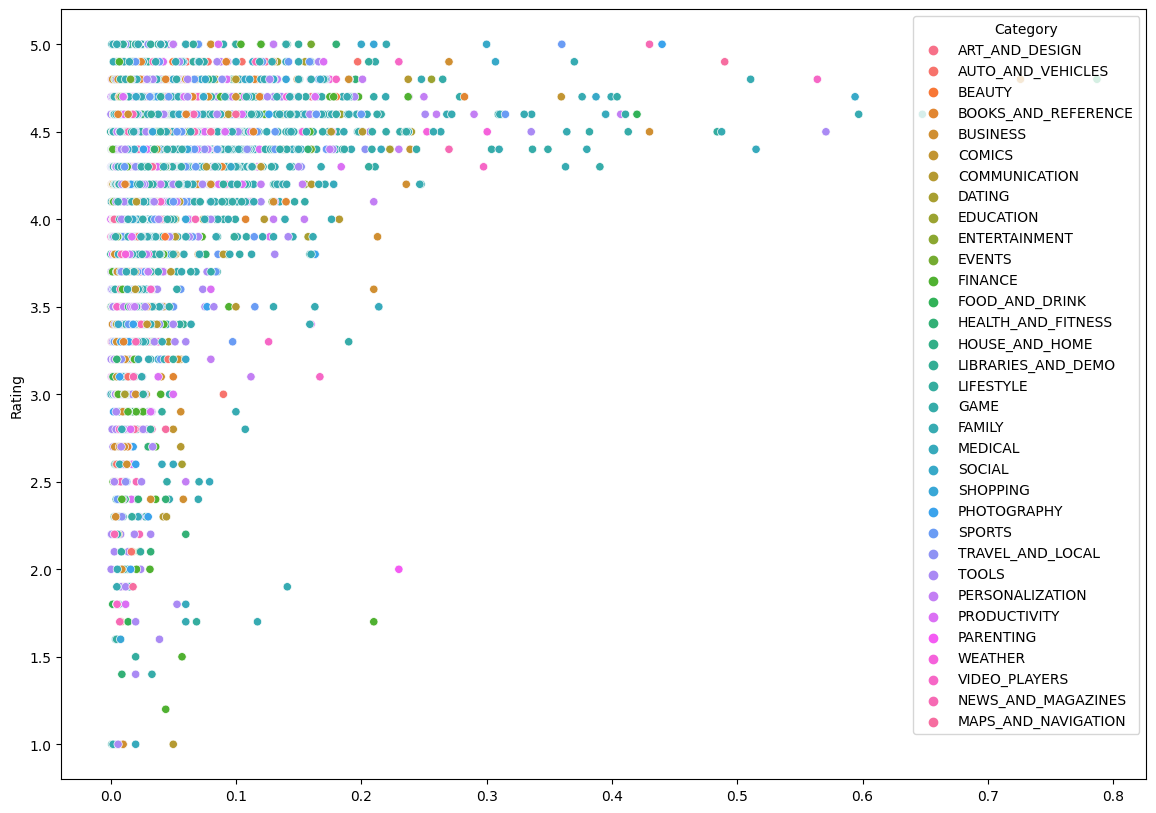

In [25]:
## Ne işe yarar no idea
fig, ax = plt.subplots(1,1,figsize=(14,10))
sns.scatterplot(x=df_outliernt["Reviews"]/df_outliernt["Installs"],y=df_outliernt["Rating"], hue=df_outliernt["Category"], legend=True, ax = ax)

In [26]:
## Weighted Rating of Categories
df["R*I"]=df["Rating"]*df["Installs"]

In [27]:
df.shape

(10828, 14)

## Install

In [28]:
df["InstallLogs"] = np.log10(df["Installs"])

C:\Users\ibera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
df = df[df["Installs"]!=0]

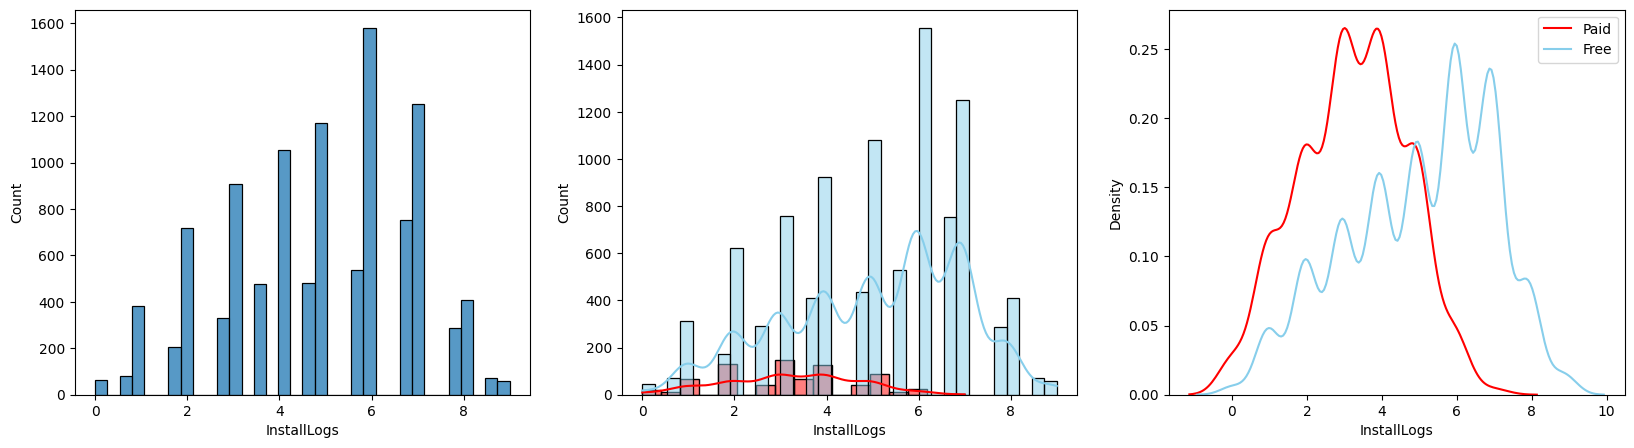

In [30]:
plot_dist( "InstallLogs")

C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\3088051632.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  h = df.groupby("Category").mean().sort_values(parameter, ascending=False).head(10)
C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\3088051632.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df.groupby("Category").mean().sort_values(parameter, ascending=False).tail(10)


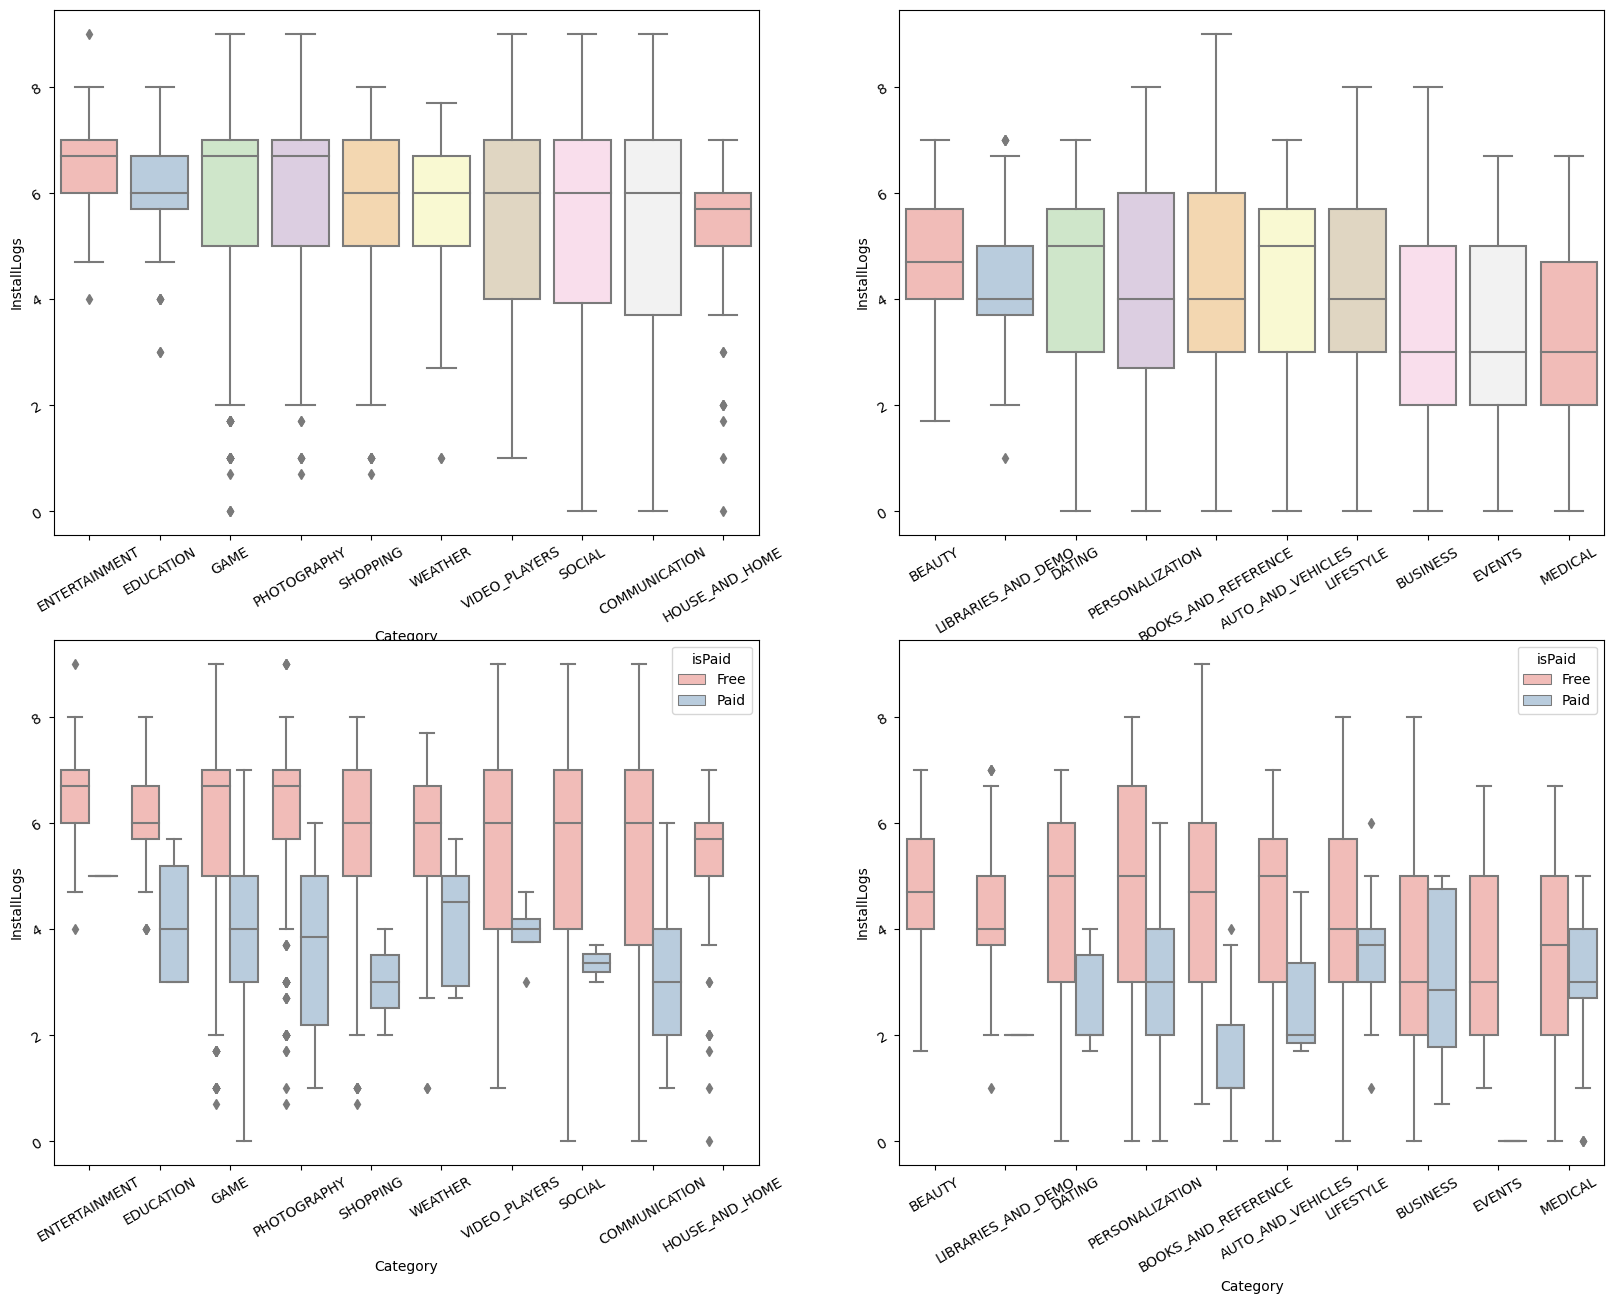

In [31]:
box_plots("InstallLogs")

C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\1761103082.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = df.groupby(["Category"]).mean()[[parameter]]
C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\1761103082.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = pd.concat([temp, df.groupby(["Category","isPaid"],as_index=False).mean().pivot_table(index="Category", columns="isPaid",values=parameter)],axis=1)


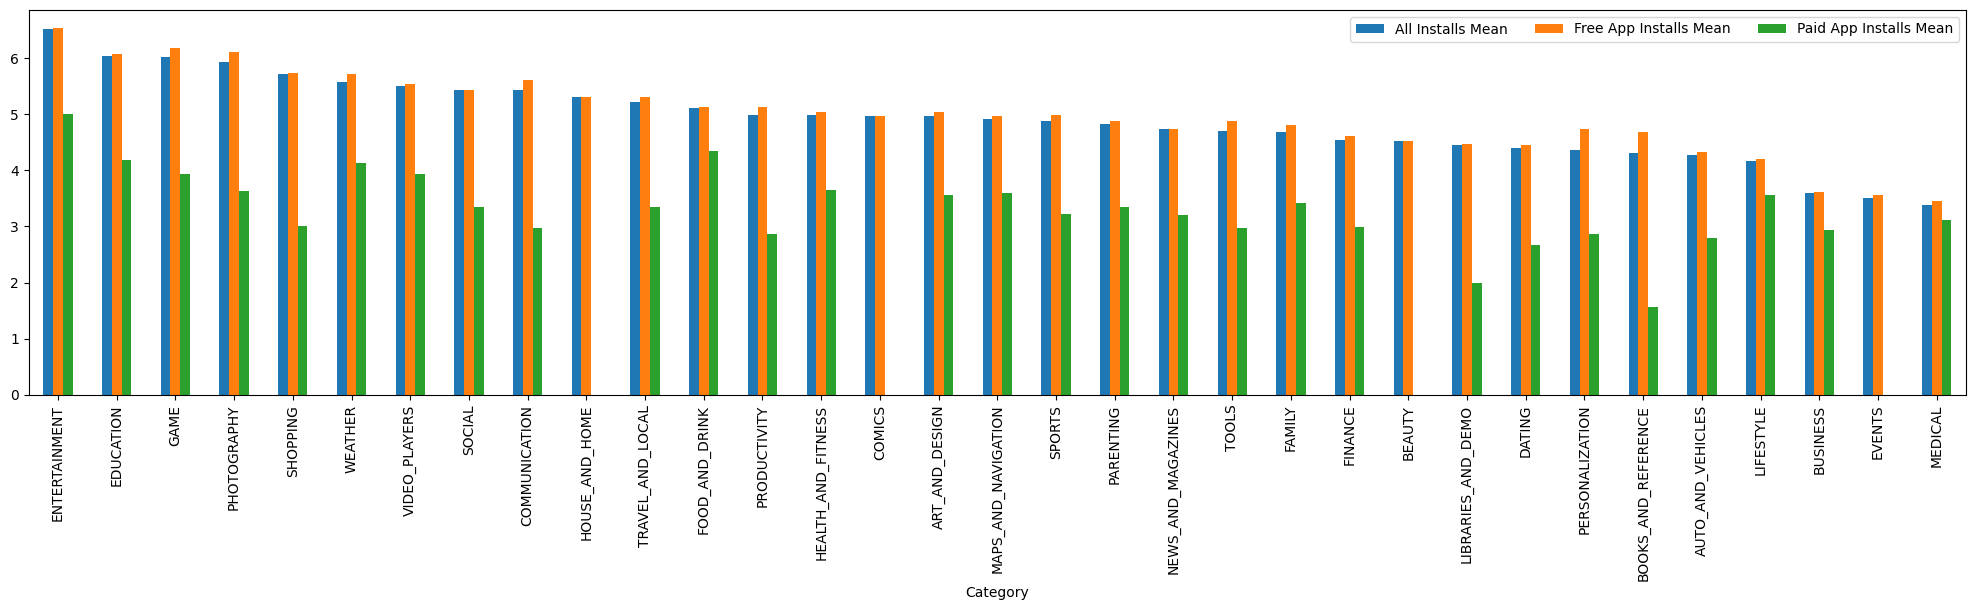

In [32]:
paid_bar("InstallLogs",["All Installs Mean",'Free App Installs Mean', 'Paid App Installs Mean'])

<AxesSubplot: xlabel='Installs', ylabel='Rating'>

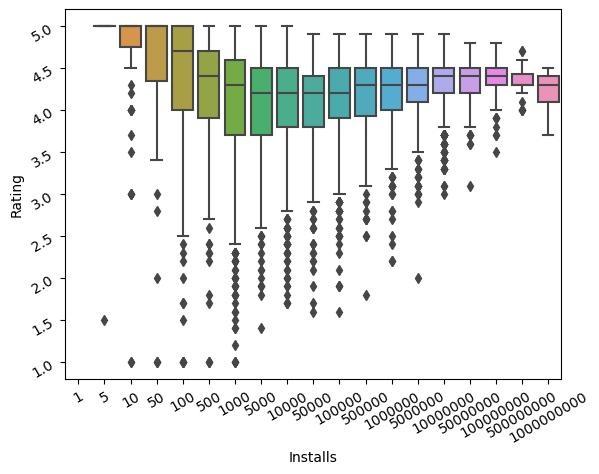

In [33]:
plt.tick_params(labelrotation=30)
sns.boxplot(df, y ="Rating",x="Installs")

<AxesSubplot: xlabel='Installs', ylabel='Size'>

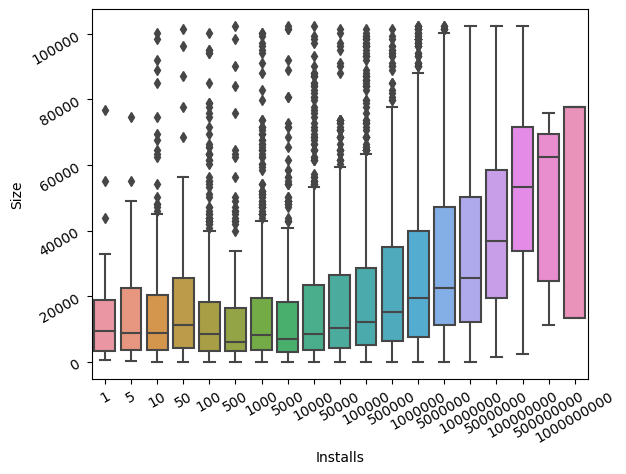

In [34]:
plt.tick_params(labelrotation=30)
sns.boxplot(df, y ="Size",x="Installs")

In [35]:
df[["Category","Rating", "Installs"]].groupby("Category").agg("describe")

Rating                                                   \
                      count      mean       std  min    25%  50%    75%  max   
Category                                                                       
ART_AND_DESIGN         62.0  4.358065  0.358297  3.2  4.100  4.4  4.700  5.0   
AUTO_AND_VEHICLES      73.0  4.190411  0.543692  2.1  4.000  4.3  4.600  4.9   
BEAUTY                 42.0  4.278571  0.362603  3.1  4.000  4.3  4.575  4.9   
BOOKS_AND_REFERENCE   178.0  4.346067  0.429046  2.7  4.100  4.5  4.600  5.0   
BUSINESS              303.0  4.121452  0.624422  1.0  3.900  4.3  4.500  5.0   
COMICS                 58.0  4.155172  0.537758  2.8  3.825  4.4  4.500  5.0   
COMMUNICATION         328.0  4.158537  0.426192  1.0  4.000  4.3  4.400  5.0   
DATING                195.0  3.970769  0.630510  1.0  3.700  4.1  4.400  5.0   
EDUCATION             155.0  4.389032  0.251894  3.5  4.200  4.4  4.600  4.9   
ENTERTAINMENT         149.0  4.126174  0.302556  3.0  3.900  4.2  4.300  4.7   
EVENTS                 45.0  4.435556  0.419499  2.9  4.200  4.5  4.700  5.0   
FAMILY               1747.0  4.192272  0.508026  1.0  4.000  4.3  4.500  5.0   
FINANCE               323.0  4.131889  0.642108  1.0  4.000  4.3  4.500  5.0   
FOOD_AND_DRINK        109.0  4.166972  0.548070  1.7  4.000  4.3  4.500  5.0   
GAME                 1093.0  4.283715  0.363477  1.0  4.100  4.4  4.500  5.0   
HEALTH_AND_FITNESS    297.0  4.277104  0.617822  1.4  4.100  4.5  4.600  5.0   
HOUSE_AND_HOME         76.0  4.197368  0.368411  2.8  4.000  4.3  4.500  4.8   
LIBRARIES_AND_DEMO     65.0  4.178462  0.378522  3.1  4.000  4.2  4.400  5.0   
LIFESTYLE             313.0  4.092652  0.693868  1.5  3.800  4.2  4.600  5.0   
MAPS_AND_NAVIGATION   124.0  4.051613  0.519926  1.9  3.775  4.2  4.400  4.9   
MEDICAL               349.0  4.186819  0.663107  1.0  4.000  4.3  4.600  5.0   
NEWS_AND_MAGAZINES    233.0  4.132189  0.536707  1.7  3.900  4.2  4.500  5.0   
PARENTING              50.0  4.300000  0.517845  2.0  4.100  4.4  4.675  5.0   
PERSONALIZATION       314.0  4.335987  0.352732  2.5  4.200  4.4  4.600  5.0   
PHOTOGRAPHY           317.0  4.192114  0.462896  2.0  4.000  4.3  4.500  5.0   
PRODUCTIVITY          351.0  4.211396  0.504931  1.0  4.100  4.3  4.500  5.0   
SHOPPING              238.0  4.259664  0.404577  1.6  4.100  4.3  4.500  5.0   
SOCIAL                258.0  4.252713  0.411995  1.9  4.100  4.3  4.500  5.0   
SPORTS                319.0  4.223511  0.427857  1.5  4.100  4.3  4.500  5.0   
TOOLS                 734.0  4.047411  0.616143  1.0  3.800  4.2  4.400  5.0   
TRAVEL_AND_LOCAL      226.0  4.109292  0.504691  2.2  3.900  4.3  4.400  5.0   
VIDEO_PLAYERS         160.0  4.063750  0.551098  1.8  3.800  4.2  4.400  4.9   
WEATHER                75.0  4.244000  0.331353  3.3  4.050  4.3  4.500  4.8   

                    Installs                                                  \
                       count          mean           std      min        25%   
Category                                                                       
ART_AND_DESIGN          64.0  1.942783e+06  6.713105e+06    100.0    10000.0   
AUTO_AND_VEHICLES       85.0  6.250613e+05  1.746710e+06      1.0     1000.0   
BEAUTY                  53.0  5.131519e+05  1.523140e+06     50.0    10000.0   
BOOKS_AND_REFERENCE    231.0  8.318050e+06  6.745986e+07      1.0     1000.0   
BUSINESS               459.0  2.182821e+06  1.020932e+07      1.0      100.0   
COMICS                  60.0  9.347692e+05  2.103069e+06     50.0    10000.0   
COMMUNICATION          387.0  8.435989e+07  2.327870e+08      1.0     5000.0   
DATING                 234.0  1.129533e+06  2.673457e+06      1.0     1000.0   
EDUCATION              156.0  5.586231e+06  1.580886e+07   1000.0   500000.0   
ENTERTAINMENT          149.0  1.925611e+07  8.473043e+07  10000.0  1000000.0   
EVENTS                  64.0  2.495806e+05  8.943732e+05      1.0      100.0   
FAMILY              

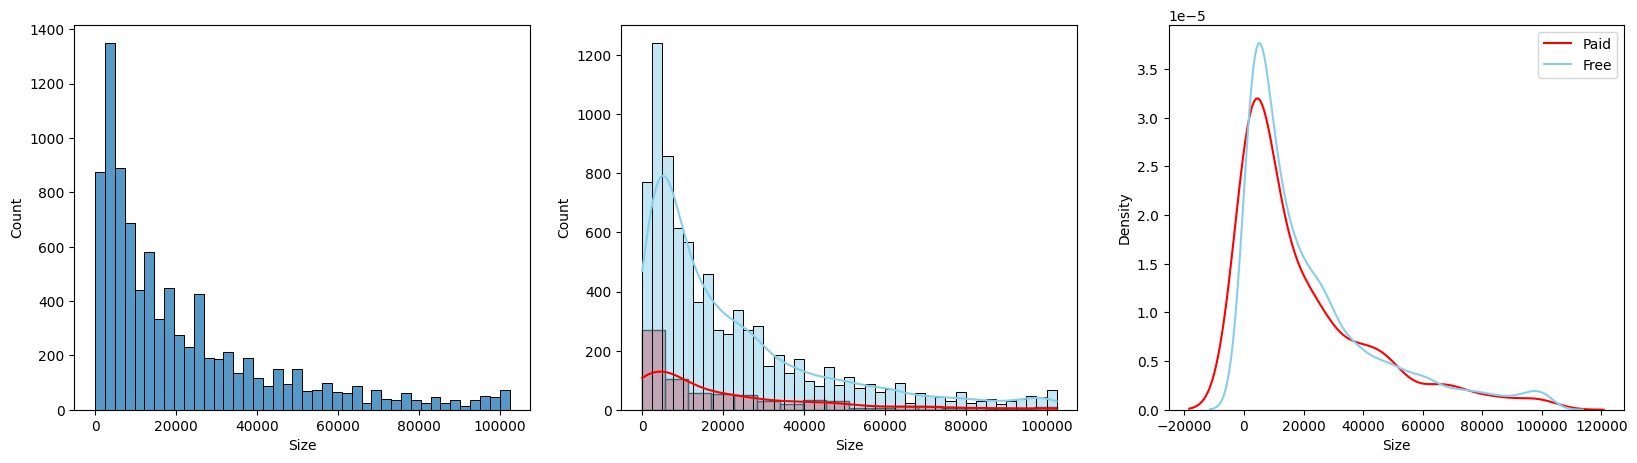

In [36]:
plot_dist("Size")

C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\3088051632.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  h = df.groupby("Category").mean().sort_values(parameter, ascending=False).head(10)
C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\3088051632.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df.groupby("Category").mean().sort_values(parameter, ascending=False).tail(10)


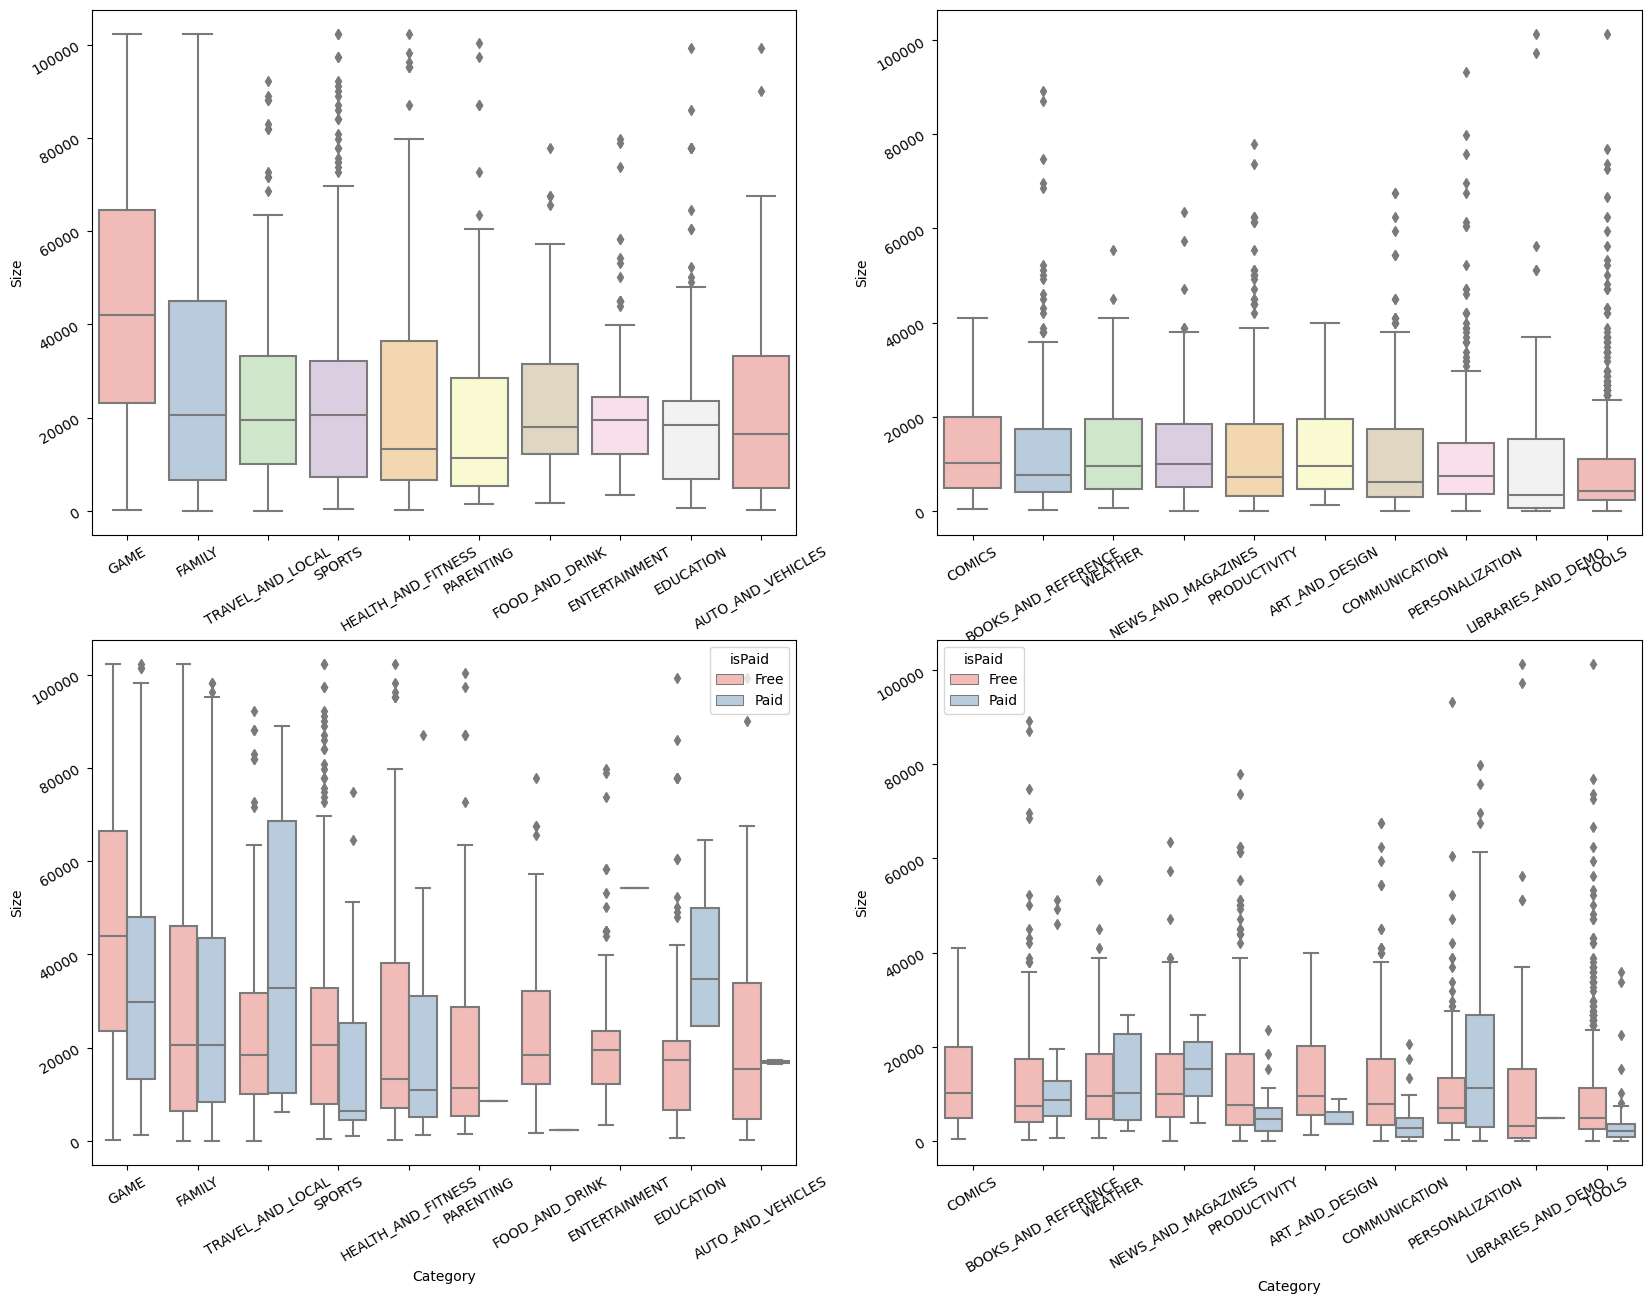

In [37]:
box_plots("Size")

## Content Rating

In [38]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,isPaid,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,R*I,InstallLogs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,False,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,41000.0,4.00000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,False,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1950000.0,5.69897
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,False,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,23500000.0,6.69897
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,False,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,225000000.0,7.69897
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,False,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,430000.0,5.00000


<AxesSubplot: xlabel='Content Rating', ylabel='InstallLogs'>

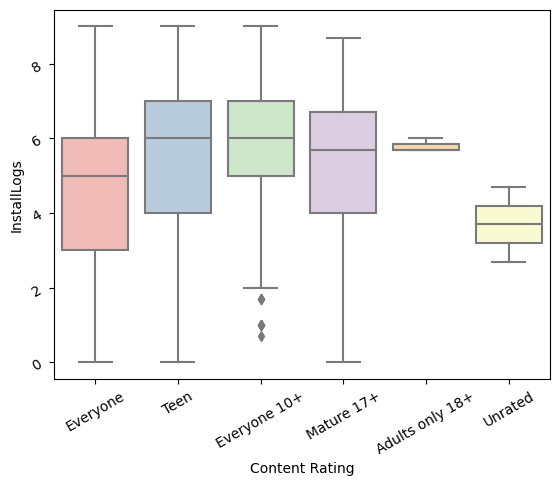

In [39]:
plt.tick_params(labelrotation=30)
sns.boxplot(df, x ="Content Rating",y="InstallLogs",palette="Pastel1")

C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\1568470310.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.heatmap(df.groupby(["Content Rating","Category"],as_index=False).mean().pivot_table(index="Category", columns="Content Rating",values = "InstallLogs").fillna(0))


<AxesSubplot: xlabel='Content Rating', ylabel='Category'>

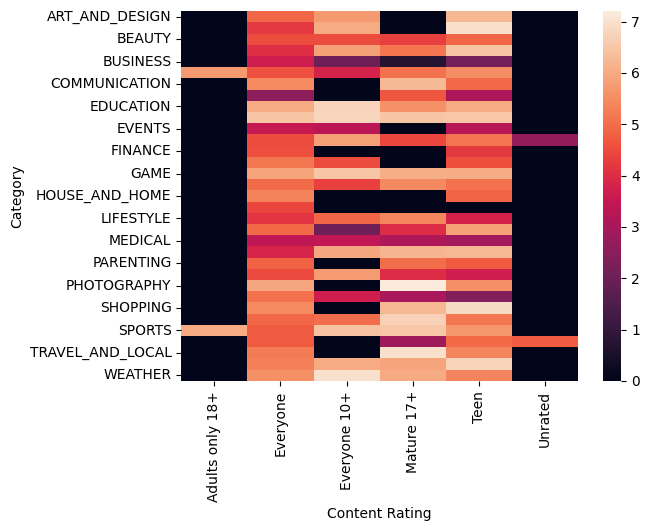

In [40]:
sns.heatmap(df.groupby(["Content Rating","Category"],as_index=False).mean().pivot_table(index="Category", columns="Content Rating",values = "InstallLogs").fillna(0))

In [41]:
games = df[(df["Category"]=="GAME") |(df["Category"]=="FAMILY")]

In [42]:
games["Genres"] = games["Genres"].apply(lambda x : x.split(";")[0])

C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\2749595327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["Genres"] = games["Genres"].apply(lambda x : x.split(";")[0])


C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\2291888069.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  games.groupby("Genres").mean()["InstallLogs"].sort_values(ascending = False).plot.bar(ax = ax[1])


<AxesSubplot: xlabel='Genres', ylabel='InstallLogs'>

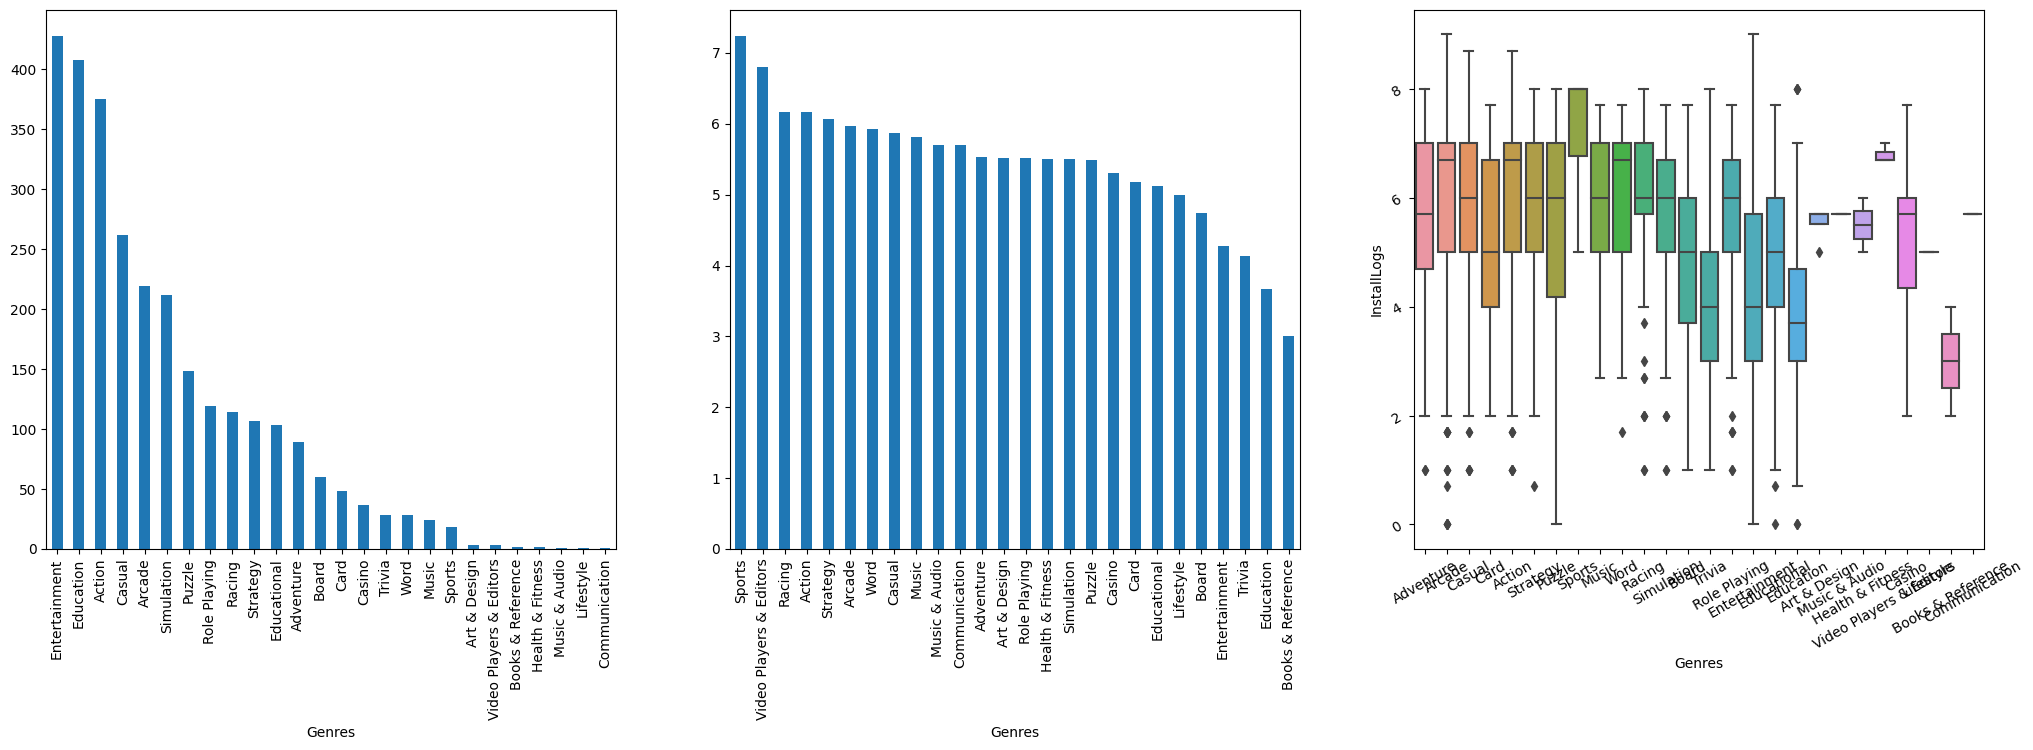

In [43]:
fig, ax = plt.subplots(1,3,figsize=(25,7))

games.groupby("Genres").count()["Rating"].sort_values(ascending = False).plot.bar(ax = ax[0])
games.groupby("Genres").mean()["InstallLogs"].sort_values(ascending = False).plot.bar(ax = ax[1])
plt.tick_params(labelrotation=30)
sns.boxplot(games, x="Genres", y ="InstallLogs",ax=ax[2])

In [44]:
def plot_dist_games(parameter) :
    fig, ax = plt.subplots(1,3,figsize=(20,5))

    sns.histplot(games[parameter], ax = ax[0])

    sns.histplot(data=games[games["isPaid"]], x=parameter, color="red", label="Paid", kde=True, ax = ax[1])
    sns.histplot(data=games[~games["isPaid"]], x=parameter, color="skyblue", label="Free", kde=True, ax = ax[1])

    sns.kdeplot(data=games[games["isPaid"]], x=parameter, color="red", label="Paid", ax = ax[2])
    sns.kdeplot(data=games[~games["isPaid"]], x=parameter, color="skyblue", label="Free", ax = ax[2])

    plt.legend() 
    plt.show()

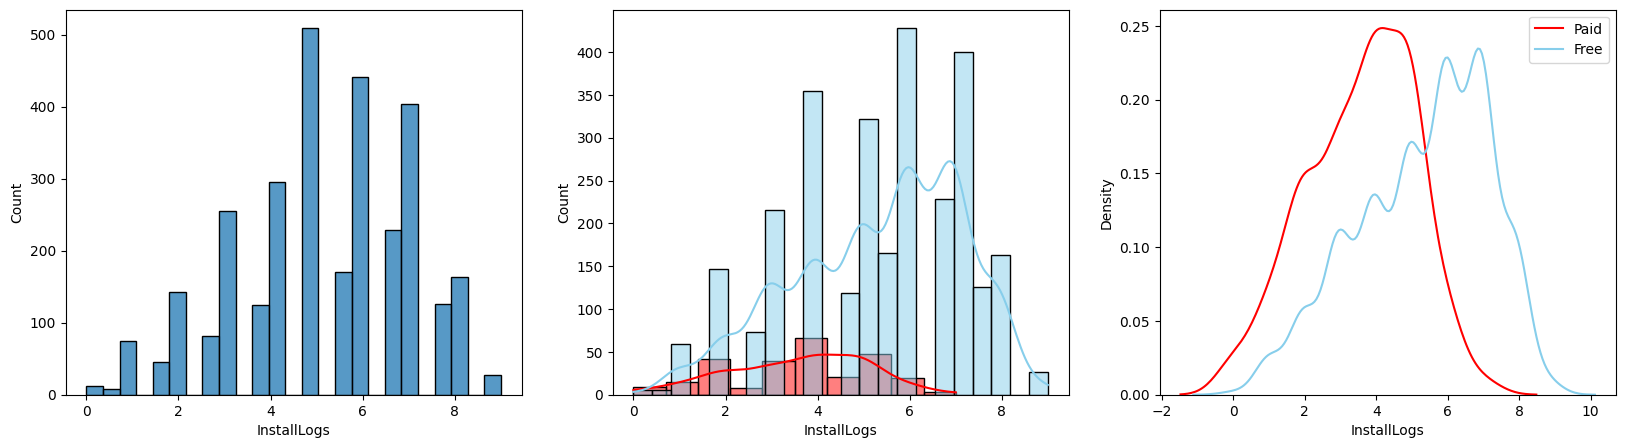

In [45]:
plot_dist_games("InstallLogs")

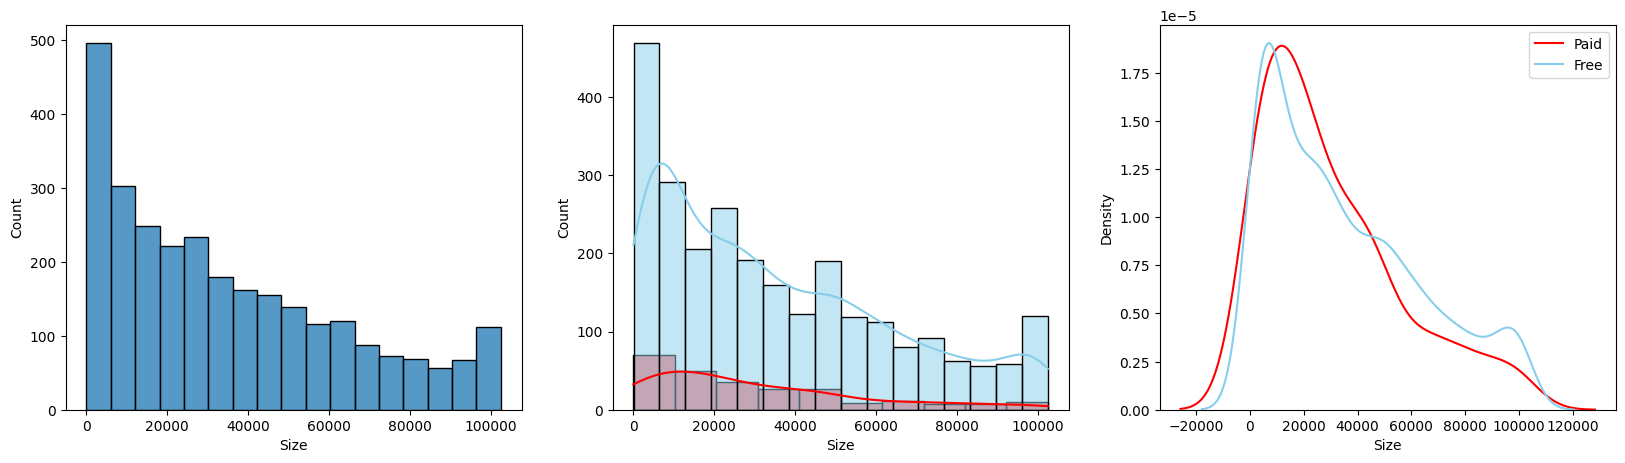

In [46]:
plot_dist_games("Size")

In [47]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,isPaid,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,R*I,InstallLogs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,False,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,41000.0,4.0


# Statistical Testing

In [48]:
from scipy import stats

### Hypotesis1: Paid applications are Installed less

In [49]:
paidGames = df[df["isPaid"]]["Installs"]
freeGames = df[~df["isPaid"]]["Installs"]
stats.ttest_ind(paidGames, freeGames,alternative ="less" )

## P value is lower than critical region 0.05 reject null hypotesis accept alternative hypotesis

Ttest_indResult(statistic=-5.268949404118517, pvalue=6.992314273572254e-08)

### Hypotesis1: Paid applications are smaller

In [50]:
paidGames = df[df["isPaid"]]["Size"]
freeGames = df[~df["isPaid"]]["Size"]
stats.ttest_ind(paidGames, freeGames,alternative ="less", nan_policy="omit")

## p value is less than 0.05 so we rejet null hypotesis and accept H1

Ttest_indResult(statistic=-2.6583151991755973, pvalue=0.003933473103639646)

## Hypotesis 1: paid applications are rated greater

In [51]:
paidGames = df[df["isPaid"]]["Rating"]
freeGames = df[~df["isPaid"]]["Rating"]
stats.ttest_ind(paidGames, freeGames,alternative ="greater", nan_policy="omit")

## p value is less than 0.05 so we rejet null hypotesis and accept H1

Ttest_indResult(statistic=3.6964731179273143, pvalue=0.00010993214698537796)

### Hypotesis1: [Category] Paid applications are installed less

In [52]:
df[df["Category"] =="ART_AND_DESIGN"]

,App,Category,Rating,Reviews,Size,Installs,isPaid,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,R*I,InstallLogs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,False,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,41000.0,4.00000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,False,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1950000.0,5.69897
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,False,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,23500000.0,6.69897
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,False,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,225000000.0,7.69897
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,False,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,430000.0,5.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6930,Fantasy theme dark bw black building,ART_AND_DESIGN,4.8,41,1945.6,5000,False,0,Everyone,Art & Design,2018-03-20,1.0.2,4.0 and up,24000.0,3.69897
7174,Easy DIY CD Craft Ideas,ART_AND_DESIGN,NaN,7,5734.4,5000,False,0,Everyone,Art & Design,2018-05-30,1.0,2.3 and up,NaN,3.69897
8679,Dp for girls,ART_AND_DESIGN,4.2,175,8396.8,50000,False,0,Everyone,Art & Design,2017-05-26,1.2,4.0.3 and up,210000.0,4.69897
8712,Name Art DP - Focus n Filter Text 2018,ART_AND_DESIGN,4.3,132,7884.8,10000,False,0,Everyone,Art & Design,2018-01-04,1,4.1 and up,43000.0,4.00000


In [53]:
def test_category(category,target, alternative ="less"):
    paidGames = df[df["isPaid"] & (df["Category"] ==category) ][target].fillna(df[target].mean())
    freeGames = df[~df["isPaid"] & (df["Category"] ==category)][target].fillna(df[target].mean())
    
    result = stats.ttest_ind(paidGames, freeGames,alternative =alternative)

    return result.pvalue

In [54]:
df_test_results_less = pd.DataFrame(columns=["Category","Install_Test","Size_Test","Rating_Test"])
df_test_results_greater = pd.DataFrame(columns=["Category","Install_Test","Size_Test","Rating_Test"])

for c in df["Category"].unique():
    i = test_category(c,"Installs")
    ig = test_category(c,"Installs","greater")
    s = test_category(c,"Size")
    sg = test_category(c,"Size","greater")
    r = test_category(c,"Rating")
    rg = test_category(c,"Rating","greater")

    df_test_results_less.loc[len(df_test_results_less.index)] = [c, i, s, r] 
    df_test_results_greater.loc[len(df_test_results_greater.index)] = [c, ig, sg, rg] 

C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\2555441714.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  result = stats.ttest_ind(paidGames, freeGames,alternative =alternative)
C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\2555441714.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  result = stats.ttest_ind(paidGames, freeGames,alternative =alternative)
C:\Users\ibera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\ibera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p

In [55]:
test_category("BEAUTY","Installs")

nan

In [56]:
df[df["Category"] == "BEAUTY"]["Rating"].mean()

4.2785714285714285

In [57]:
df_test_results_less.sort_values("Install_Test")

,Category,Install_Test,Size_Test,Rating_Test
26,PERSONALIZATION,0.001160,0.999986,0.997892
17,GAME,0.001655,0.003154,0.952938
19,MEDICAL,0.002875,0.270779,0.886162
18,FAMILY,0.013172,0.278976,0.996183
6,COMMUNICATION,0.025455,0.000098,0.147879
23,SPORTS,0.038212,0.167631,0.657011
25,TOOLS,0.042346,0.000109,0.957314
27,PRODUCTIVITY,0.073075,0.001229,0.466594
22,PHOTOGRAPHY,0.096540,0.075446,0.096435
29,WEATHER,0.103539,0.421425,0.846418


In [58]:
df_test_results_greater.sort_values("Install_Test")

,Category,Install_Test,Size_Test,Rating_Test
31,NEWS_AND_MAGAZINES,0.607878,0.510340,0.027887
9,ENTERTAINMENT,0.625637,0.036517,0.012628
20,SOCIAL,0.650671,0.858190,0.977177
28,PARENTING,0.689290,0.669811,0.998111
30,VIDEO_PLAYERS,0.689761,0.540202,0.461509
0,ART_AND_DESIGN,0.693723,0.921862,0.027848
1,AUTO_AND_VEHICLES,0.728856,0.574349,0.317128
24,TRAVEL_AND_LOCAL,0.742304,0.004951,0.483795
21,SHOPPING,0.746605,0.948796,0.184091
13,HEALTH_AND_FITNESS,0.747763,0.541189,0.296298


## Hypotesis testing visualiztion

In [59]:
df_test_results_less.dropna(inplace=True)

([<matplotlib.axis.XTick at 0x28202a36500>,
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BOOKS_AND_REFERENCE'),
  Text(3, 0, 'BUSINESS'),
  Text(4, 0, 'COMMUNICATION'),
  Text(5, 0, 'DATING'),
  Text(6, 0, 'EDUCATION'),
  Text(7, 0, 'ENTERTAINMENT'),
  Text(8, 0, 'FINANCE'),
  Text(9, 0, 'FOOD_AND_DRINK'),
  Text(10, 0, 'HEALTH_AND_FITNESS'),
  Text(11, 0, 'LIFESTYLE'),
  Text(12, 0, 'GAME'),
  Text(13, 0, 'FAMILY'),
  Text(14, 0, 'MEDICAL'),
  Text(15, 0, 'SOCIAL'),
  Text(16, 0, 'SHOPPING'),
  Text(17, 0, 'PHOTOGRAPHY'),
  Text(18, 0, 'SPORTS'),
  Text(19, 0, 'TRAVEL_AND_LOCAL'),
  Text(20, 0, 'TOOLS'),
  Text(21, 0, 'PERSONALIZATION'),
  Text(22, 0, 'PRODUCTIVITY'),
  Text(23, 0, 'PARENTING'),
  Text(24, 0, 'WEATHER'),
  Text(25, 0, 'VIDEO_PLAYERS'),
  Text(26, 0, 'NEWS_AND_MAGAZINES'),
  Text(27, 0, 'MAPS_AND_NAVIGATION')])

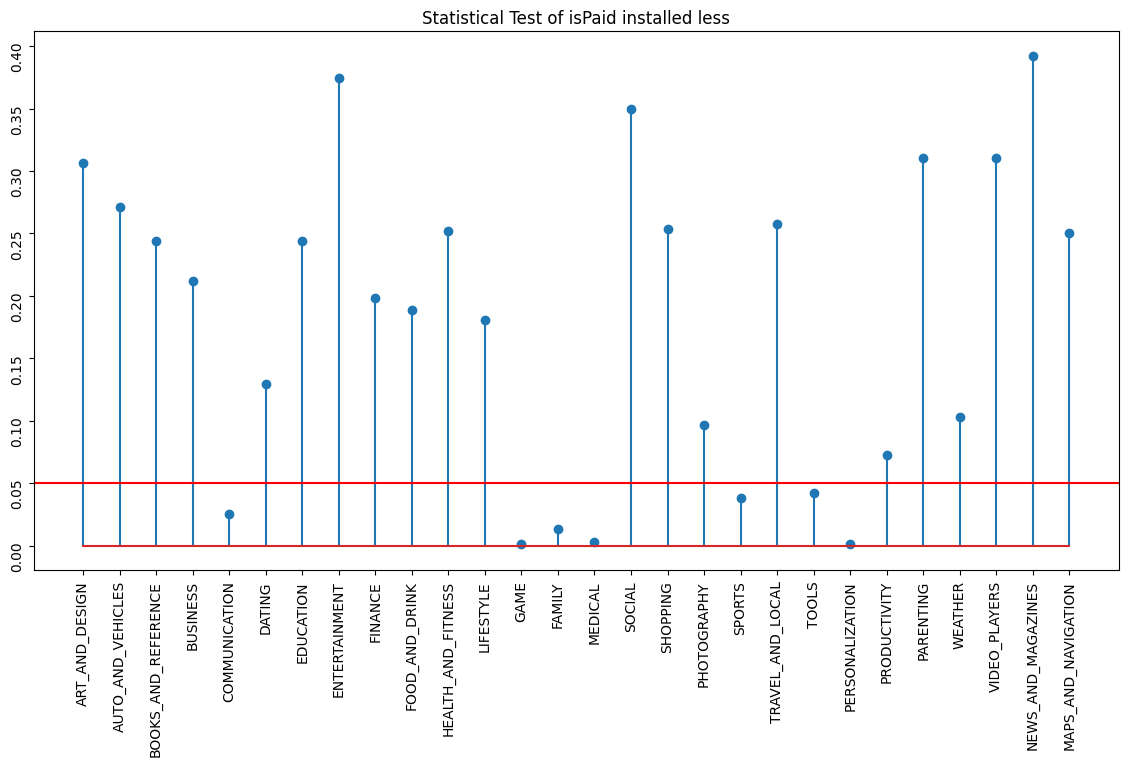

In [60]:
fig ,ax = plt.subplots(1,1,figsize=(14,7))
my_range=range(0,len(df_test_results_less.index))
plt.tick_params(labelrotation=90)
plt.stem(df_test_results_less["Install_Test"])
plt.axhline(y = 0.05, color = 'r', linestyle = '-')
plt.title("Statistical Test of isPaid installed less")
plt.xticks(my_range, df_test_results_less["Category"] )

### Content Rating

In [61]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [62]:
table =  df[(df["Content Rating"] != "Adults only 18+") & (df["Content Rating"]!="Unrated")]\
            .groupby(["Installs","Content Rating"],as_index=False).count()\
                .pivot_table(index="Content Rating",columns="Installs",values="Rating")\
                    .fillna(0)\
                        .drop(1,axis=1)

In [63]:
table

Installs,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000
Content Rating,,,,,,,,,,,,,,,,,,
Everyone,8.0,58.0,53.0,259.0,182.0,631.0,390.0,871.0,379.0,928.0,396.0,1215.0,563.0,910.0,196.0,284.0,57.0,34.0
Everyone 10+,0.0,1.0,0.0,2.0,2.0,14.0,6.0,26.0,17.0,41.0,31.0,73.0,36.0,86.0,14.0,39.0,3.0,6.0
Mature 17+,0.0,3.0,0.0,19.0,8.0,19.0,12.0,37.0,18.0,70.0,44.0,84.0,32.0,75.0,14.0,23.0,3.0,0.0
Teen,0.0,5.0,3.0,29.0,9.0,49.0,24.0,75.0,52.0,111.0,65.0,204.0,121.0,181.0,65.0,63.0,9.0,18.0


In [64]:
_, p , _, _ =stats.chi2_contingency(table)
print(p)

3.808321199567253e-43


## Games hypotesis testing

### H1: Paid Games Installed Less

In [65]:
paidGames = games[games["isPaid"]]["Installs"]
freeGames = games[~games["isPaid"]]["Installs"]
stats.ttest_ind(paidGames, freeGames,alternative ="less" )

## P value is lower than critical region 0.05 reject null hypotesis accept alternative hypotesis

Ttest_indResult(statistic=-3.7801287927500145, pvalue=7.984779452809103e-05)

### Paid Games are bigger

In [66]:
paidGames = games[games["isPaid"]]["Size"]
freeGames = games[~games["isPaid"]]["Size"]
stats.ttest_ind(paidGames, freeGames,alternative ="greater" , nan_policy="omit")
##failed to reject null

Ttest_indResult(statistic=-2.7532078888057083, pvalue=0.9970304882748476)

# Prediction

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree

In [68]:
df["R/I"] = df["Reviews"]/df["Installs"]

In [69]:
features = ["Category","Rating","R/I","Size","isPaid","Price","Content Rating"]

In [70]:
df.Price = df.Price.apply(lambda x : float(x.replace("$","")))

In [71]:
df[['Rating']] = df[['Rating']].fillna(value=df.Rating.mean())
df[['Size']] = df[['Size']].fillna(value=df.Size.mean())

In [72]:
x = pd.get_dummies(df[features],columns=["Category","Content Rating"])
y = df["InstallLogs"]

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, shuffle=False)

<AxesSubplot: xlabel='InstallLogs'>

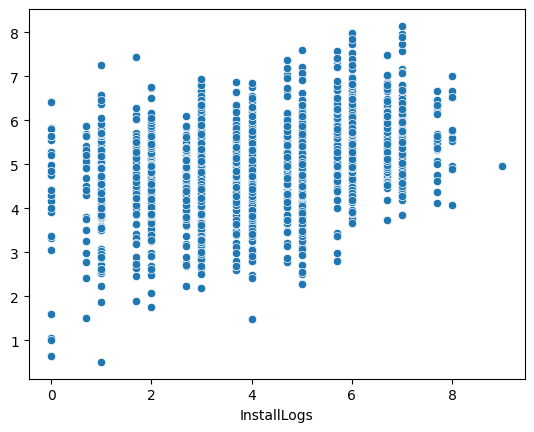

In [110]:
model = LinearRegression()
model.fit(x_train,y_train)
p = model.predict(x_test)
sns.scatterplot(x = y_test, y =p)

<AxesSubplot: xlabel='InstallLogs'>

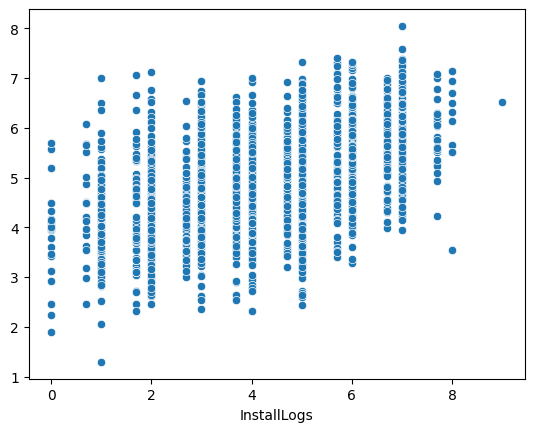

In [111]:
model = KNeighborsRegressor()
model.fit(x_train,y_train)
p2 = model.predict(x_test)
sns.scatterplot(x = y_test, y =(p+p2)/2)


<AxesSubplot: xlabel='InstallLogs'>

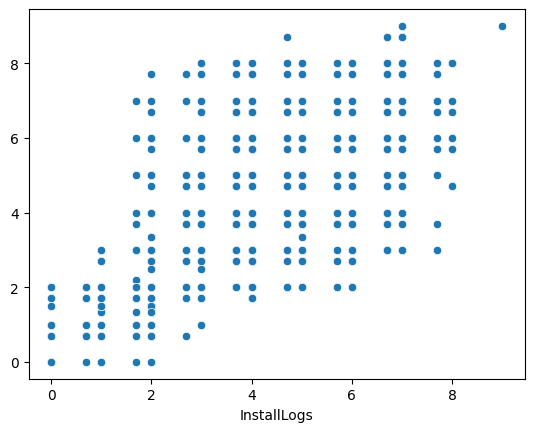

In [112]:
model = tree.DecisionTreeRegressor()
model.fit(x_train,y_train)
p3 = model.predict(x_test)
sns.scatterplot(x = y_test, y =p3)

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
y_test

8668     6.00000
8669     5.00000
8670     7.00000
8671     5.69897
8672     4.00000
          ...   
10836    3.69897
10837    2.00000
10838    3.00000
10839    3.00000
10840    7.00000
Name: InstallLogs, Length: 2163, dtype: float64

<AxesSubplot: xlabel='InstallLogs'>

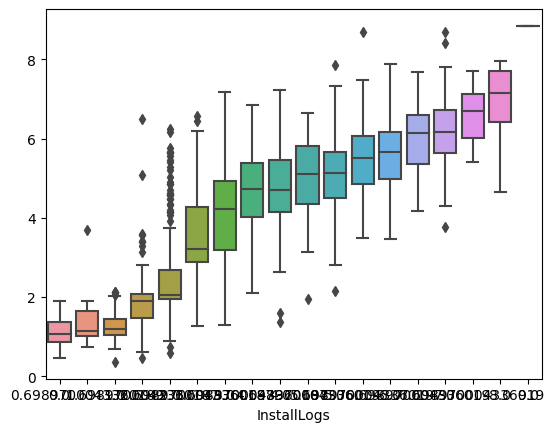

In [115]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
p5 = model.predict(x_test)
sns.boxplot(x = y_test, y =p5)

<AxesSubplot: xlabel='InstallLogs'>

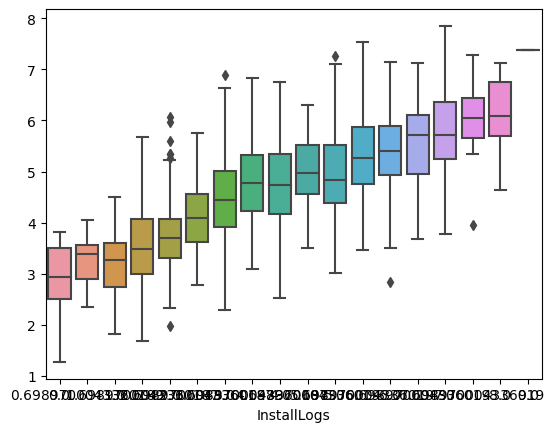

In [116]:
sns.boxplot(x = y_test, y =(p+p2+p3+np.log10(p4)+p5)/5)

In [117]:
final_pred=(p+p2+p3+p5)/4

C:\Users\ibera\AppData\Local\Temp\ipykernel_9380\3001948585.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r,c].set_xticklabels([0, 0.7, 1, 1.7, 2, 2.7, 3, 3.7, 4, 4.7, 5, 5.7, 6, 6.7, 7, 7.7, 8, 8.7])


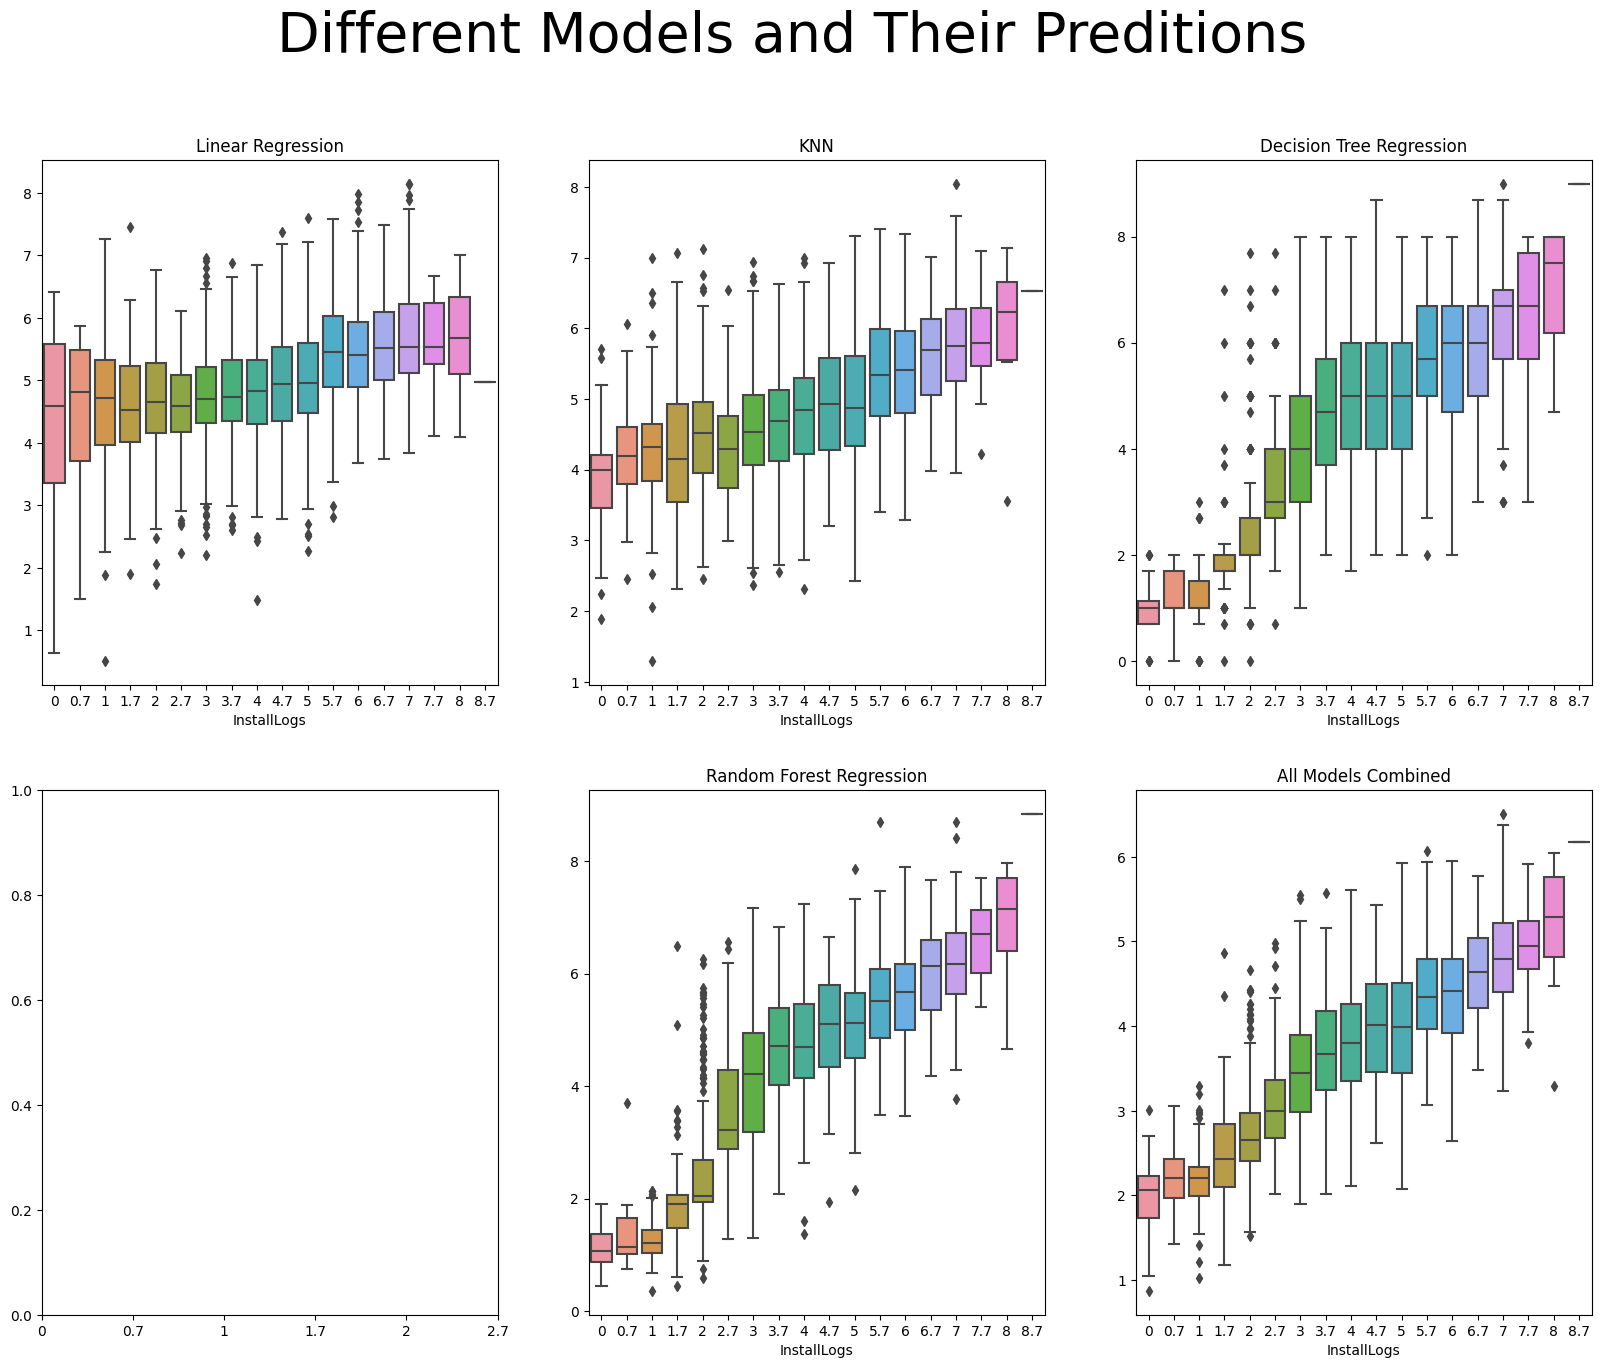

In [147]:
fig, ax = plt.subplots(2,3,figsize=(20,15))

fig.suptitle("Different Models and Their Preditions",size=40)

sns.boxplot(x = (10**y_test).astype(int), y =p, ax=ax[0,0]).set(title='Linear Regression') #LR

sns.boxplot(x = (10**y_test).astype(int), y =(p+p2)/2, ax = ax[0,1]).set(title='KNN')

sns.boxplot(x = (10**y_test).astype(int), y =p3, ax = ax[0,2]).set(title='Decision Tree Regression')

sns.boxplot(x = (10**y_test).astype(int), y =p5 , ax = ax[1,1]).set(title='Random Forest Regression')

sns.boxplot(x = (10**y_test).astype(int), y =(p+p2+p3+p5)/5, ax = ax[1,2]).set(title='All Models Combined')

for r in range(2):
    for c in range(3):
        ax[r,c].set_xticklabels([0, 0.7, 1, 1.7, 2, 2.7, 3, 3.7, 4, 4.7, 5, 5.7, 6, 6.7, 7, 7.7, 8, 8.7])

In [126]:
x_test

,Rating,R/I,Size,isPaid,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
8668,4.300000,0.011402,5427.200000,False,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8669,4.500000,0.010070,5324.800000,False,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8670,4.500000,0.040165,71680.000000,False,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8671,4.500000,0.016386,41984.000000,False,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8672,4.500000,0.009700,1945.600000,False,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,4.500000,0.007600,54272.000000,False,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,5.000000,0.040000,3686.400000,False,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10838,4.191174,0.003000,9728.000000,False,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10839,4.500000,0.114000,22047.199441,False,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.metrics import mean_squared_error

In [119]:
print("Linear Regression MSE=",mean_squared_error(y_test, p))
print("KNN MSE=",mean_squared_error(y_test, p2))
print("Decision Tree Regression MSE=",mean_squared_error(y_test, p3))
print("Random Forest=",mean_squared_error(y_test, p5))
print("Combined Model MSE=",mean_squared_error(y_test, final_pred))

Linear Regression MSE= 3.758726704347887
KNN MSE= 3.369549322185899
Decision Tree Regression MSE= 2.1292452672255564
Random Forest= 1.408035063702073
Combined Model MSE= 1.7731067449360234


## Top 10 applications that have according to rate of growth
predicted log-Current log shows how many times application is predicted to grow. Ex: 4 means applications popularity will increase by 10^4

In [148]:
top10 = pd.DataFrame(final_pred-y_test).sort_values("InstallLogs",ascending = False).head(10).merge(df,right_index=True,left_index = True).rename(columns={"InstallLogs_x": "predicted LogInstall-Current LogInstall", "InstallLogs_y=":"InstallLogs"})

In [149]:
top10

,predicted LogInstall-Current LogInstall,App,Category,Rating,Reviews,Size,Installs,isPaid,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,R*I,InstallLogs_y,R/I
9297,4.386077,EF Universe: Endless Battle,FAMILY,4.200000,5,55296.000000,50,False,0.0,Teen,Role Playing,2018-07-31,4541.25.51,4.1 and up,210.0,1.69897,0.100
9305,3.933304,EF Calculator,PRODUCTIVITY,4.700000,19,22047.199441,1000,False,0.0,Everyone,Productivity,2017-09-20,1.6.1,Varies with device,4700.0,3.00000,0.019
9758,3.875100,Super Doctor 2 - My Newborn Baby ER Injection,FAMILY,4.700000,54,94208.000000,1000,False,0.0,Teen,Role Playing,2018-06-25,1.0,4.3 and up,4700.0,3.00000,0.054
9266,3.823791,SCS eC,PRODUCTIVITY,4.400000,7,17408.000000,100,False,0.0,Everyone,Productivity,2016-10-21,1.0.1,4.1 and up,440.0,2.00000,0.070
8876,3.761199,DT Freight,PRODUCTIVITY,4.191174,0,55296.000000,1,False,0.0,Everyone,Productivity,2017-11-29,8.0,4.0.3 and up,NaN,0.00000,0.000
9906,3.751088,EU Life Explorer,NEWS_AND_MAGAZINES,4.000000,2,12288.000000,50,False,0.0,Everyone,News & Magazines,2017-05-08,1.1,4.1 and up,200.0,1.69897,0.040
10585,3.559925,FL House,PRODUCTIVITY,4.400000,29,22047.199441,1000,False,0.0,Everyone,Productivity,2016-11-22,1.6.7,Varies with device,4400.0,3.00000,0.029
10805,3.533602,Scoreboard FR,LIFESTYLE,4.300000,3,15360.000000,100,False,0.0,Everyone,Lifestyle,2018-08-07,2.1,4.2 and up,430.0,2.00000,0.030
8947,3.529153,DV Car Service,MAPS_AND_NAVIGATION,4.600000,10,25600.000000,100,False,0.0,Everyone,Maps & Navigation,2017-08-09,1.002,4.0.3 and up,460.0,2.00000,0.100
9885,3.528046,R-EU-READY,GAME,4.100000,13,16384.000000,500,False,0.0,Everyone,Trivia,2016-03-02,1.5,2.2 and up,2050.0,2.69897,0.026
